In [1]:
import cv2
import numpy as np
import mediapipe as mp
import matplotlib.pyplot as plt
import csv
import math
from csv import writer

In [3]:

mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_pose = mp.solutions.pose

    

#Video
vidcoordinates = []
vidvalue = []
vidnames=[]
namessubjects = ['Marcus','Andrei','Elsa','Nathalie','Oskar','Viktor']
for i in range(2):
    for j in namessubjects:
        for k in range(10):
                vidvalue.append(i)
                vidnames.append(f'Benataxi {i} - {j} - {k+1}.mp4')
print(vidnames)
#vidnamess = ['Pares i arm right 3 - 1080 50fps - 1_Trim.mp4', 'Pares i arm right 3 - 1080 50fps - 2_Trim.mp4']
#vidnamess = ['nataliepeka1_1_20.mp4', 'nataliepeka1_4_20.mp4']
counter = 0
for i in vidnames:
    print(i)
    if counter == 10:
        counter = 0
    counter += 1
    if "Elsa" in i or "Oskar" in i:
        if counter <= 5:
            counter2 = counter + 5
        if counter > 5:
            counter2 = counter - 5
    else:
        counter2 = counter
    print(counter2)
    allpoints = []
    cap = cv2.VideoCapture(i)
    with mp_pose.Pose(
        min_detection_confidence=0.5,
        min_tracking_confidence=0.5) as pose:
      while cap.isOpened():
        success, image = cap.read()
        if not success:
          print("Ignoring empty camera frame.")
          # If loading a video, use 'break' instead of 'continue'.
          break

        # To improve performance, optionally mark the image as not writeable to
        # pass by reference.
        image.flags.writeable = False
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        results = pose.process(image)

        # Draw the pose annotation on the image.
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        mp_drawing.draw_landmarks(
            image,
            results.pose_landmarks,
            mp_pose.POSE_CONNECTIONS,
            landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
        # Flip the image horizontally for a selfie-view display.
        image_hight, image_width, _ = image.shape
        x_coordinate_left_heel = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HEEL].x * image_width
        y_coordinate_left_heel = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HEEL].y * image_hight
        x_coordinate_right_heel = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HEEL].x * image_width
        y_coordinate_right_heel = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HEEL].y * image_hight
        x_coordinate_right_knee = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_KNEE].x * image_width
        y_coordinate_right_knee = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_KNEE].y * image_hight
        x_coordinate_left_knee = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_KNEE].x * image_width
        y_coordinate_left_knee = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_KNEE].y * image_hight
        cv2.imshow('MediaPipe Pose', cv2.flip(image, 1))
        if cv2.waitKey(5) & 0xFF == 27:
          break
        if x_coordinate_left_heel is not None and x_coordinate_right_knee is not None and counter > 5:
                dist = math.sqrt((y_coordinate_left_heel-y_coordinate_right_knee)**2+(x_coordinate_left_heel-x_coordinate_right_knee)**2)
                allpoints.append(dist) 
        if x_coordinate_right_heel is not None and x_coordinate_left_knee is not None and counter <= 5:
                dist = math.sqrt((y_coordinate_right_heel-y_coordinate_left_knee)**2+(x_coordinate_right_heel-x_coordinate_left_knee)**2)
                allpoints.append(dist)
    with open('vidcoordinates_mediapipe_ataxi_ben.csv', 'a') as f_object:
        writer_object = writer(f_object)
        writer_object.writerow(allpoints)
        f_object.close()
#print(vidcoordinates)

['Benataxi 0 - Marcus - 1.mp4', 'Benataxi 0 - Marcus - 2.mp4', 'Benataxi 0 - Marcus - 3.mp4', 'Benataxi 0 - Marcus - 4.mp4', 'Benataxi 0 - Marcus - 5.mp4', 'Benataxi 0 - Marcus - 6.mp4', 'Benataxi 0 - Marcus - 7.mp4', 'Benataxi 0 - Marcus - 8.mp4', 'Benataxi 0 - Marcus - 9.mp4', 'Benataxi 0 - Marcus - 10.mp4', 'Benataxi 0 - Andrei - 1.mp4', 'Benataxi 0 - Andrei - 2.mp4', 'Benataxi 0 - Andrei - 3.mp4', 'Benataxi 0 - Andrei - 4.mp4', 'Benataxi 0 - Andrei - 5.mp4', 'Benataxi 0 - Andrei - 6.mp4', 'Benataxi 0 - Andrei - 7.mp4', 'Benataxi 0 - Andrei - 8.mp4', 'Benataxi 0 - Andrei - 9.mp4', 'Benataxi 0 - Andrei - 10.mp4', 'Benataxi 0 - Elsa - 1.mp4', 'Benataxi 0 - Elsa - 2.mp4', 'Benataxi 0 - Elsa - 3.mp4', 'Benataxi 0 - Elsa - 4.mp4', 'Benataxi 0 - Elsa - 5.mp4', 'Benataxi 0 - Elsa - 6.mp4', 'Benataxi 0 - Elsa - 7.mp4', 'Benataxi 0 - Elsa - 8.mp4', 'Benataxi 0 - Elsa - 9.mp4', 'Benataxi 0 - Elsa - 10.mp4', 'Benataxi 0 - Nathalie - 1.mp4', 'Benataxi 0 - Nathalie - 2.mp4', 'Benataxi 0 - Nathal

Ignoring empty camera frame.
Benataxi 1 - Andrei - 8.mp4
8
Ignoring empty camera frame.
Benataxi 1 - Andrei - 9.mp4
9
Ignoring empty camera frame.
Benataxi 1 - Andrei - 10.mp4
10
Ignoring empty camera frame.
Benataxi 1 - Elsa - 1.mp4
6
Ignoring empty camera frame.
Benataxi 1 - Elsa - 2.mp4
7
Ignoring empty camera frame.
Benataxi 1 - Elsa - 3.mp4
8
Ignoring empty camera frame.
Benataxi 1 - Elsa - 4.mp4
9
Ignoring empty camera frame.
Benataxi 1 - Elsa - 5.mp4
10
Ignoring empty camera frame.
Benataxi 1 - Elsa - 6.mp4
1
Ignoring empty camera frame.
Benataxi 1 - Elsa - 7.mp4
2
Ignoring empty camera frame.
Benataxi 1 - Elsa - 8.mp4
3
Ignoring empty camera frame.
Benataxi 1 - Elsa - 9.mp4
4
Ignoring empty camera frame.
Benataxi 1 - Elsa - 10.mp4
5
Ignoring empty camera frame.
Benataxi 1 - Nathalie - 1.mp4
1
Ignoring empty camera frame.
Benataxi 1 - Nathalie - 2.mp4
2
Ignoring empty camera frame.
Benataxi 1 - Nathalie - 3.mp4
3
Ignoring empty camera frame.
Benataxi 1 - Nathalie - 4.mp4
4
Ignor

In [2]:
#From csv to list
#Börja med att köra denna när du har 'vidcoordinates.csv' i samma mapp som denna fil

import csv
import cv2 as cv
import matplotlib.pyplot as plt
import csv
from csv import writer

with open('vidcoordinates_mediapipe_ataxi_ben.csv', newline='') as f:
    reader = csv.reader(f)
    data = list(reader)

newbetterlist = []
for i in data:
    if i:
        newbetterlist.append(i)
print(newbetterlist)

[['362.29132478708124', '365.2766139857165', '369.4356502012355', '371.257166690098', '371.9342744974094', '371.315153386331', '370.54948229595993', '366.98609562798634', '365.6969084407617', '365.0701567323713', '364.75478474031405', '364.1131687390462', '363.65502238897733', '363.1745799464579', '363.09124258182237', '362.85336493587045', '360.86306597171625', '358.1105672761756', '351.1214670785918', '345.23978390161744', '342.58792844351086', '339.63157888826635', '337.4028644067996', '331.74179325615324', '347.571313069025', '340.2044693484716', '332.07117329728607', '318.8333434920792', '311.46183460845305', '296.0084988448831', '273.2347571873294', '277.9596567827496', '270.53996124512423', '266.0475634356463', '264.6561158361097', '241.17612675533846', '230.64468043158507', '212.06462628300935', '198.7295406910163', '173.04902698394574', '146.26961325976526', '131.59065516271968', '118.82297171281726', '107.06051880772299', '97.86855107355596', '83.65381311123012', '69.37551292

In [3]:
vidcoordinates = newbetterlist

In [4]:
#Make strings into ints

for i in range(len(vidcoordinates)):
    for j in range(len(vidcoordinates[i])):
        vidcoordinates[i][j] = float(vidcoordinates[i][j])
print(vidcoordinates)

[[362.29132478708124, 365.2766139857165, 369.4356502012355, 371.257166690098, 371.9342744974094, 371.315153386331, 370.54948229595993, 366.98609562798634, 365.6969084407617, 365.0701567323713, 364.75478474031405, 364.1131687390462, 363.65502238897733, 363.1745799464579, 363.09124258182237, 362.85336493587045, 360.86306597171625, 358.1105672761756, 351.1214670785918, 345.23978390161744, 342.58792844351086, 339.63157888826635, 337.4028644067996, 331.74179325615324, 347.571313069025, 340.2044693484716, 332.07117329728607, 318.8333434920792, 311.46183460845305, 296.0084988448831, 273.2347571873294, 277.9596567827496, 270.53996124512423, 266.0475634356463, 264.6561158361097, 241.17612675533846, 230.64468043158507, 212.06462628300935, 198.7295406910163, 173.04902698394574, 146.26961325976526, 131.59065516271968, 118.82297171281726, 107.06051880772299, 97.86855107355596, 83.65381311123012, 69.37551292143317, 59.12153997675406, 63.85427993646363, 62.69901866165819, 75.21663201815703, 74.850856

In [5]:
#Append zeroes to make same size

lengths = []
for i in vidcoordinates:
    lengths.append(len(i))
print(lengths)
print(max(lengths))

for i in vidcoordinates:
    while len(i) < max(lengths):
        i.append(0)
print(vidcoordinates)

[199, 188, 262, 259, 225, 217, 214, 251, 236, 235, 298, 270, 280, 280, 257, 250, 270, 259, 247, 257, 115, 118, 138, 129, 139, 129, 129, 126, 139, 131, 215, 207, 240, 209, 213, 236, 205, 200, 194, 183, 300, 274, 311, 280, 247, 243, 219, 217, 206, 191, 150, 248, 196, 185, 163, 173, 144, 149, 141, 189, 346, 388, 352, 382, 399, 369, 355, 422, 394, 534, 335, 273, 384, 348, 358, 310, 345, 410, 351, 397, 143, 156, 123, 121, 129, 144, 118, 121, 126, 133, 461, 426, 487, 490, 483, 489, 476, 471, 456, 394, 576, 385, 343, 342, 392, 337, 401, 486, 384, 445, 406, 394, 407, 447, 513, 409, 391, 474, 481, 525]
576
[[362.29132478708124, 365.2766139857165, 369.4356502012355, 371.257166690098, 371.9342744974094, 371.315153386331, 370.54948229595993, 366.98609562798634, 365.6969084407617, 365.0701567323713, 364.75478474031405, 364.1131687390462, 363.65502238897733, 363.1745799464579, 363.09124258182237, 362.85336493587045, 360.86306597171625, 358.1105672761756, 351.1214670785918, 345.23978390161744, 342.58

In [6]:
vidvalue = []
namessubjects = ['Marcus','Andrei','Elsa','Nathalie','Oskar','Viktor']
for i in range(2):
    for j in namessubjects:
        for k in range(10):
                vidvalue.append(i)
print(len(vidvalue))


120


0


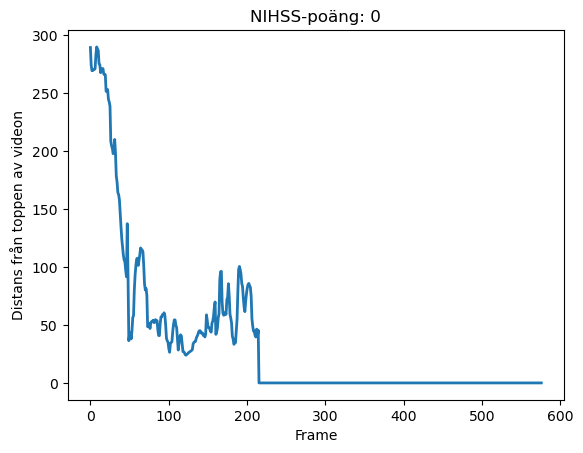

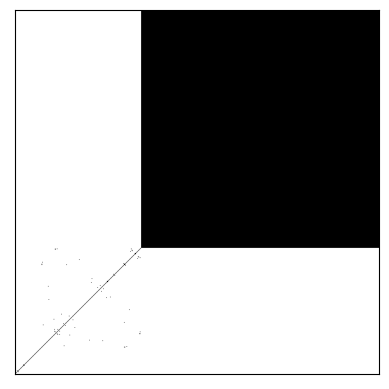

(1, 576, 576)


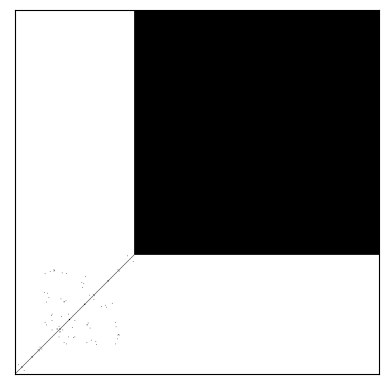

(1, 576, 576)


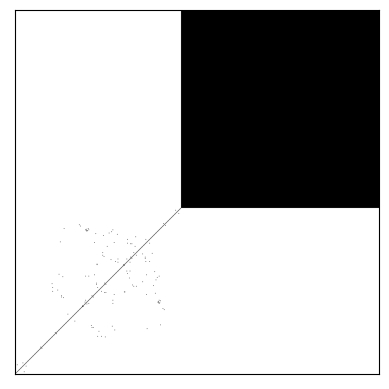

(1, 576, 576)


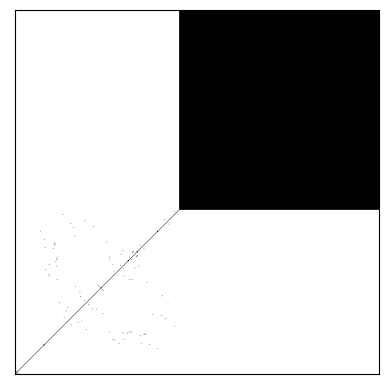

(1, 576, 576)


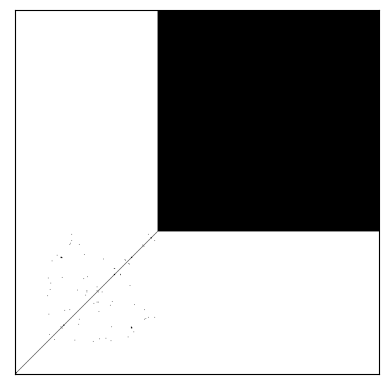

(1, 576, 576)


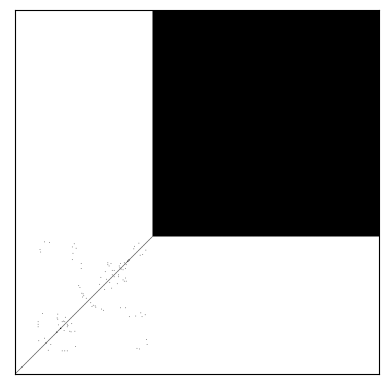

(1, 576, 576)


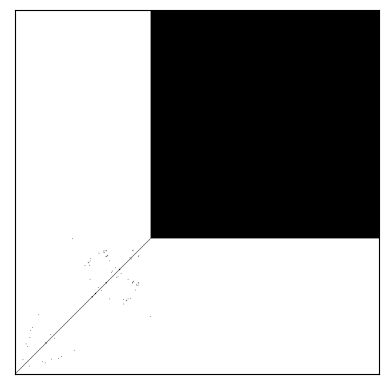

(1, 576, 576)


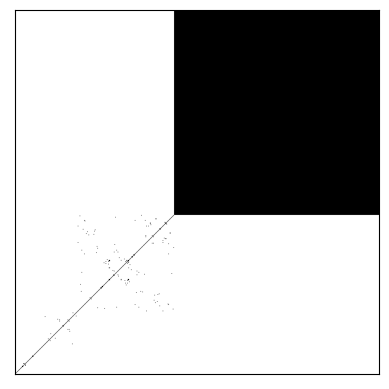

(1, 576, 576)


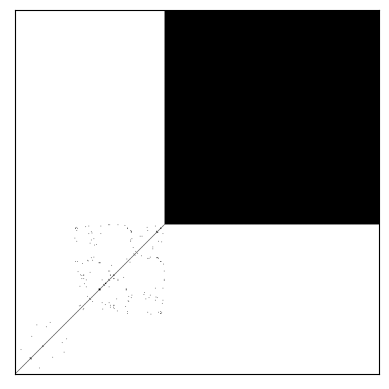

(1, 576, 576)


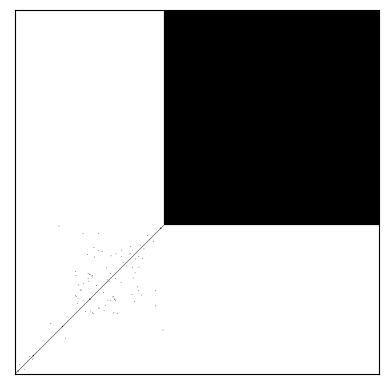

(1, 576, 576)


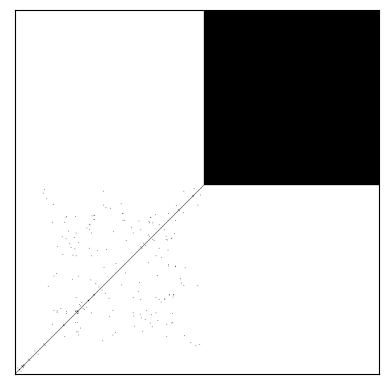

(1, 576, 576)


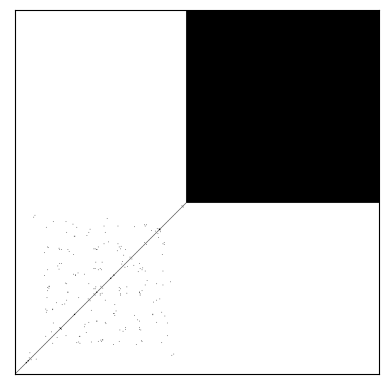

(1, 576, 576)


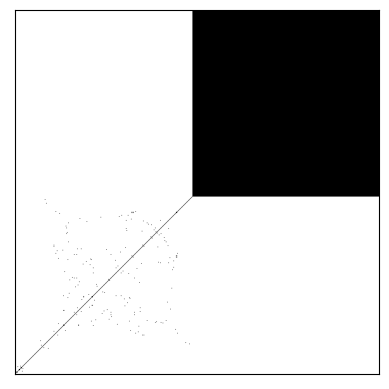

(1, 576, 576)


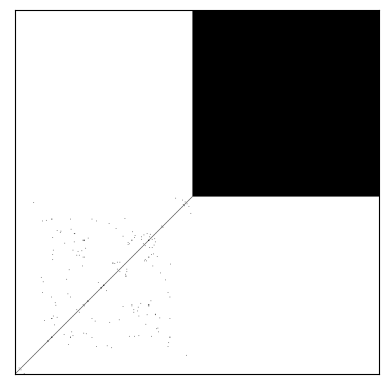

(1, 576, 576)


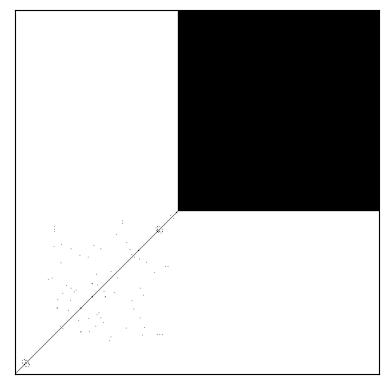

(1, 576, 576)


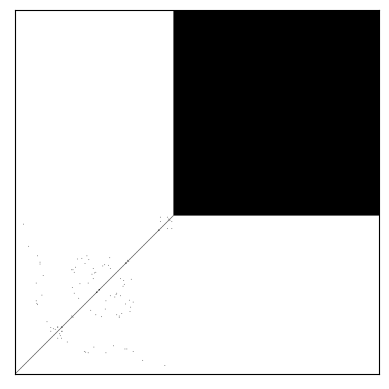

(1, 576, 576)


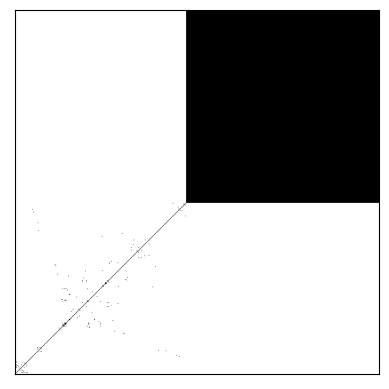

(1, 576, 576)


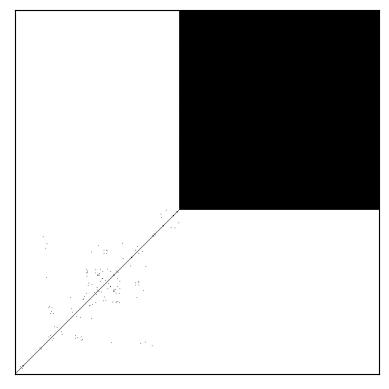

(1, 576, 576)


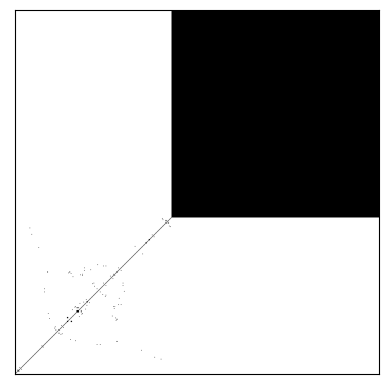

(1, 576, 576)


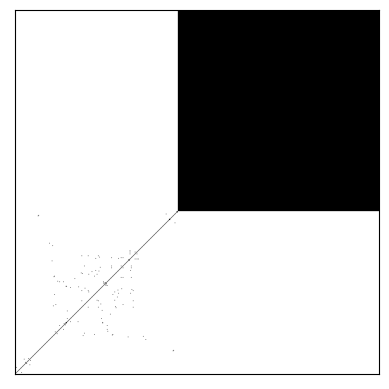

(1, 576, 576)


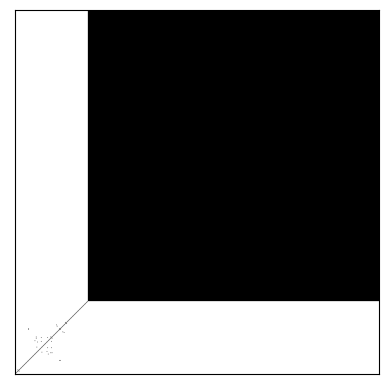

(1, 576, 576)


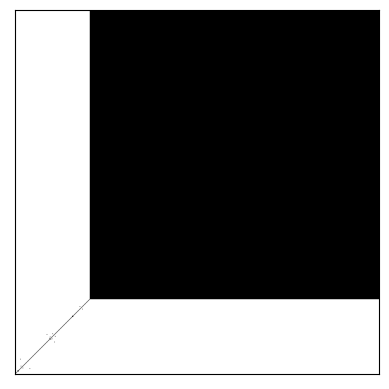

(1, 576, 576)


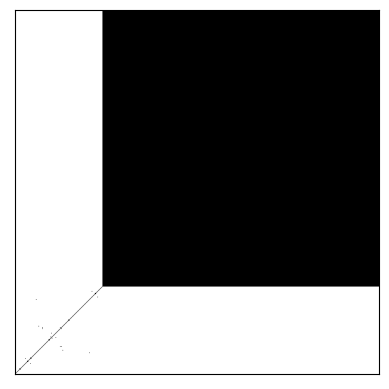

(1, 576, 576)


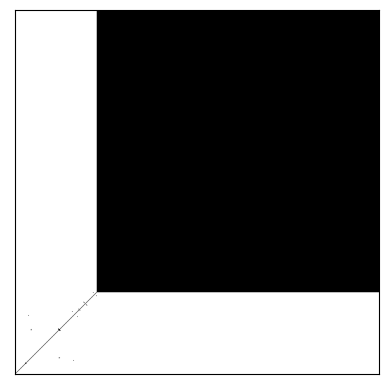

(1, 576, 576)


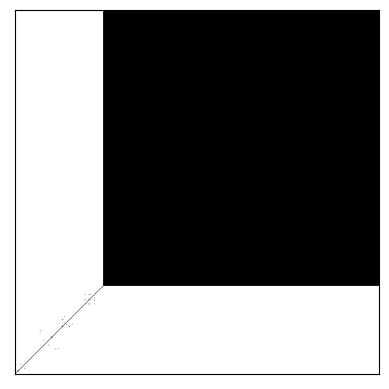

(1, 576, 576)


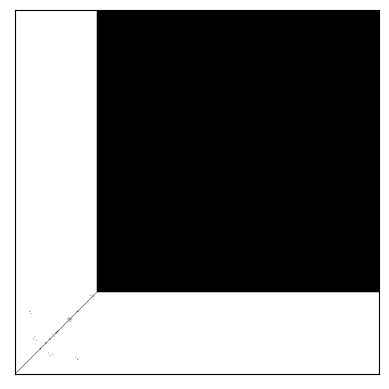

(1, 576, 576)


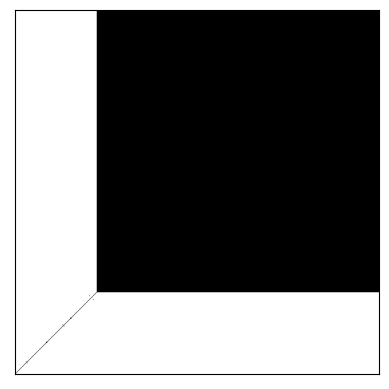

(1, 576, 576)


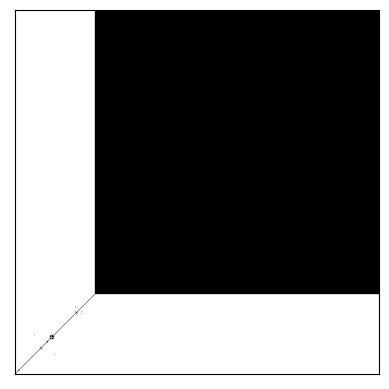

(1, 576, 576)


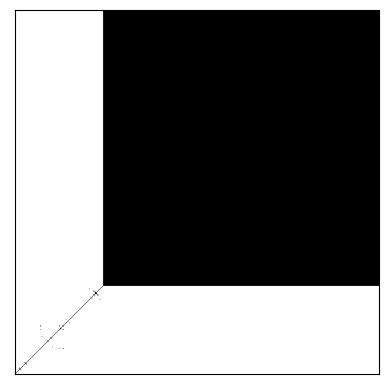

(1, 576, 576)


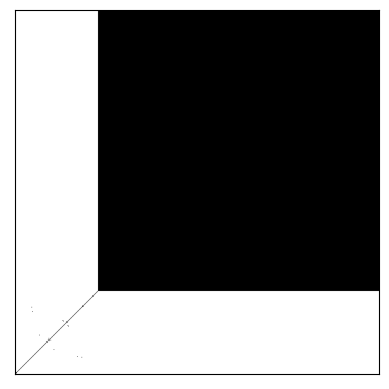

(1, 576, 576)


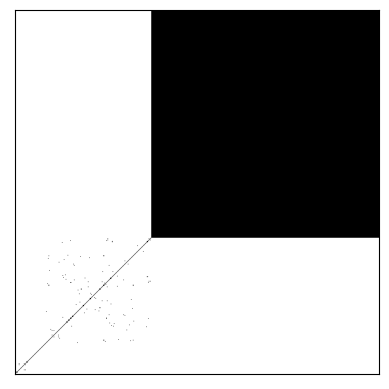

(1, 576, 576)


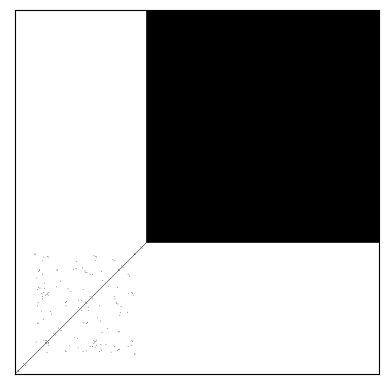

(1, 576, 576)


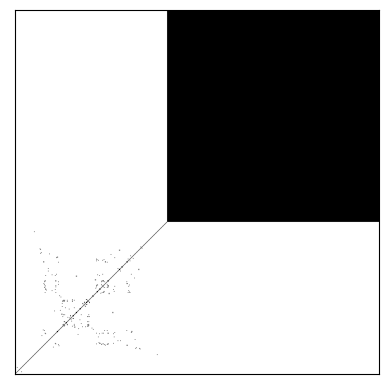

(1, 576, 576)


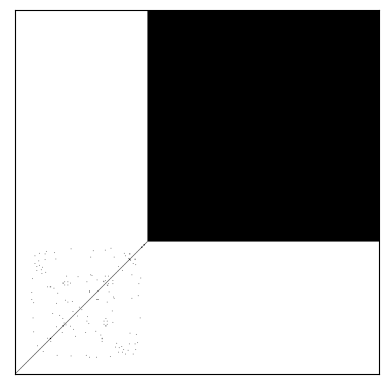

(1, 576, 576)


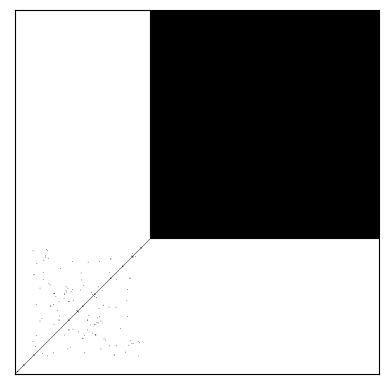

(1, 576, 576)


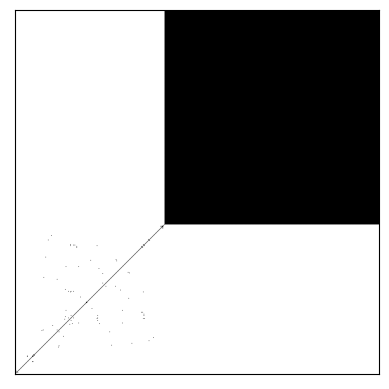

(1, 576, 576)


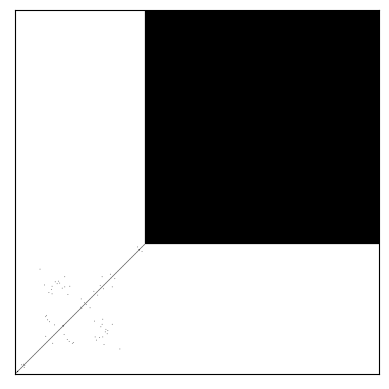

(1, 576, 576)


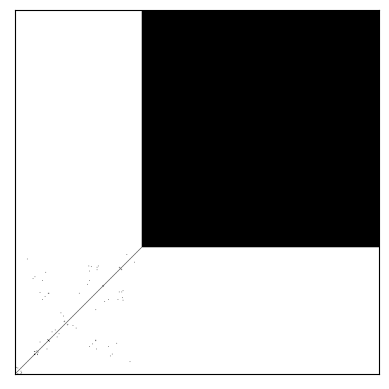

(1, 576, 576)


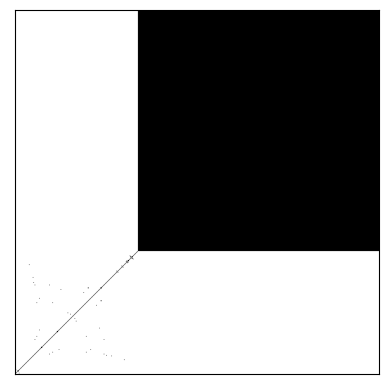

(1, 576, 576)


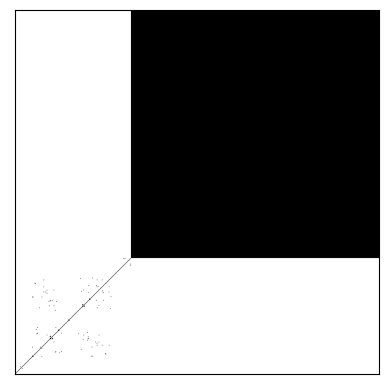

(1, 576, 576)


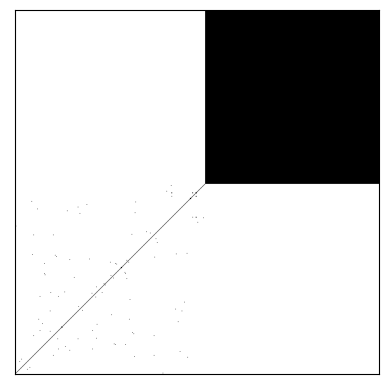

(1, 576, 576)


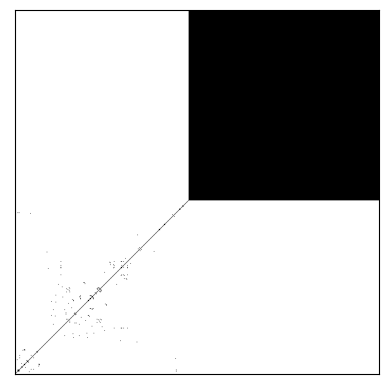

(1, 576, 576)


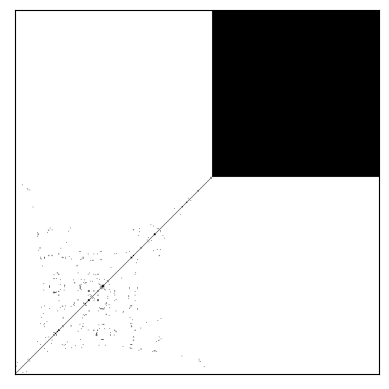

(1, 576, 576)


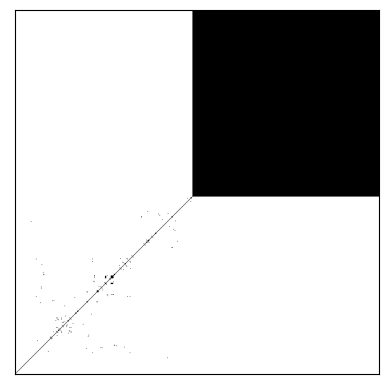

(1, 576, 576)


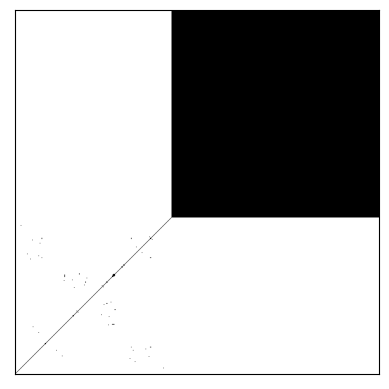

(1, 576, 576)


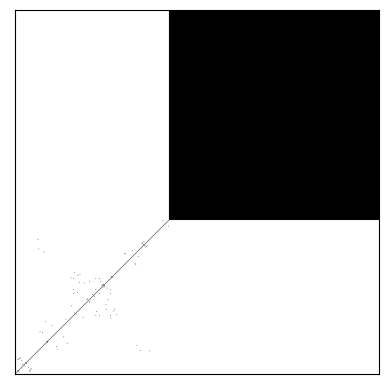

(1, 576, 576)


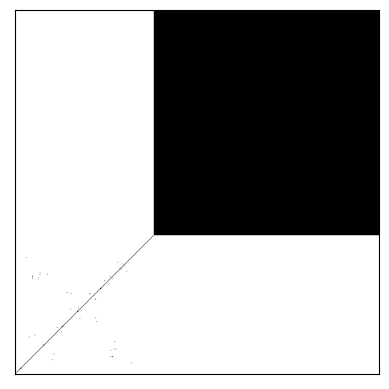

(1, 576, 576)


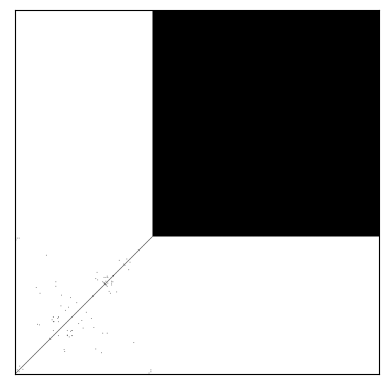

(1, 576, 576)


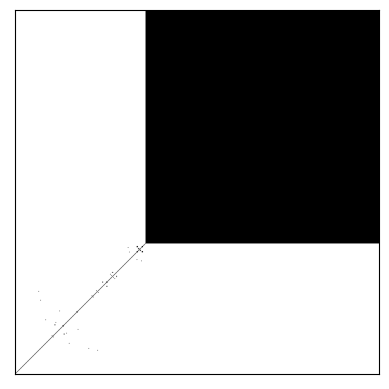

(1, 576, 576)


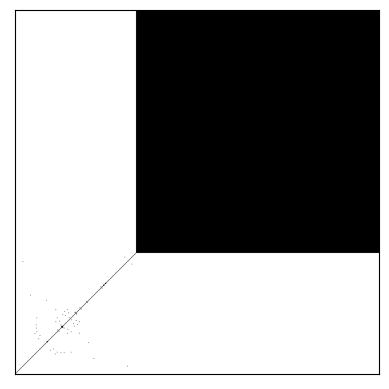

(1, 576, 576)


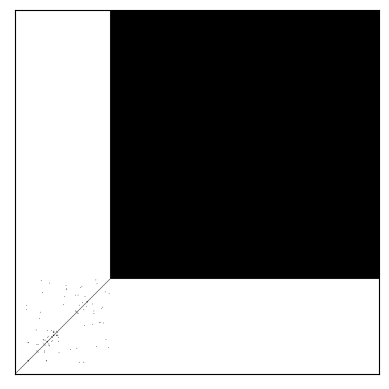

(1, 576, 576)


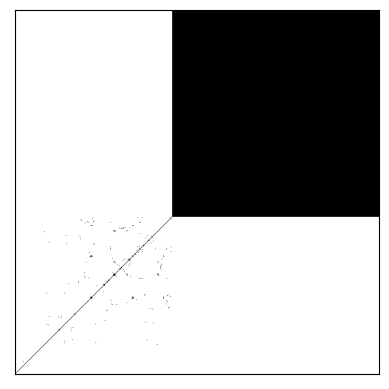

(1, 576, 576)


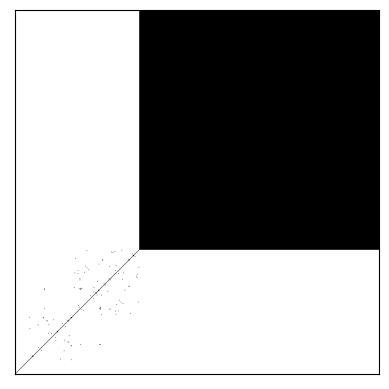

(1, 576, 576)


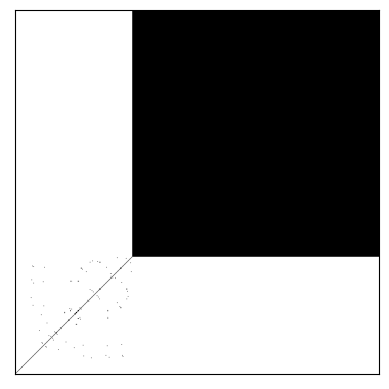

(1, 576, 576)


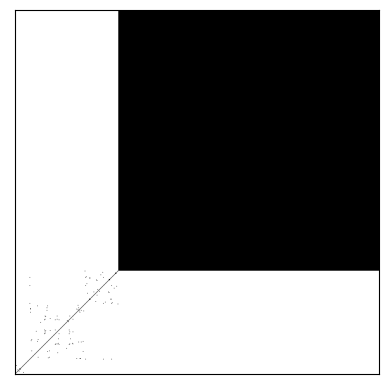

(1, 576, 576)


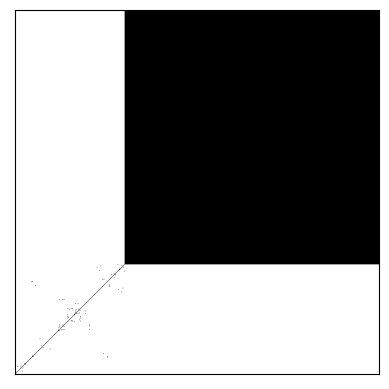

(1, 576, 576)


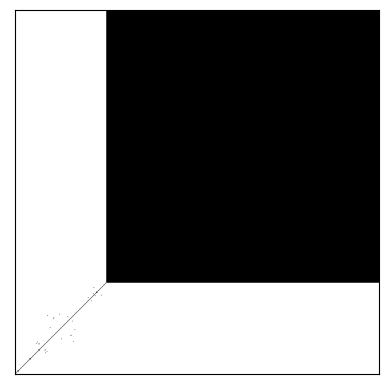

(1, 576, 576)


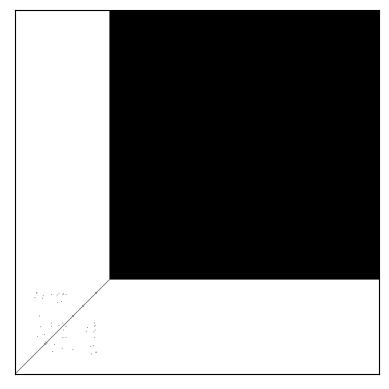

(1, 576, 576)


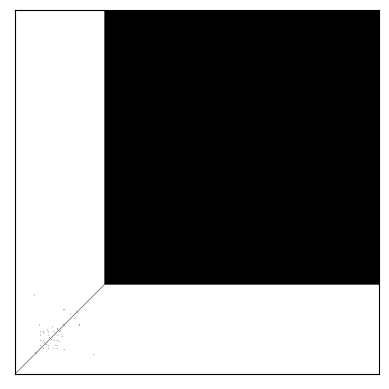

(1, 576, 576)


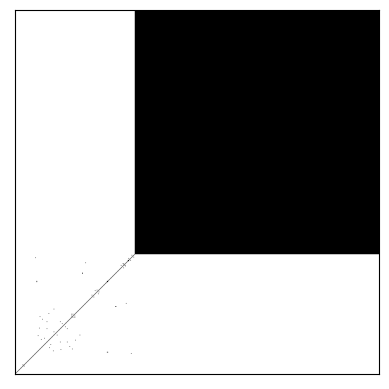

(1, 576, 576)


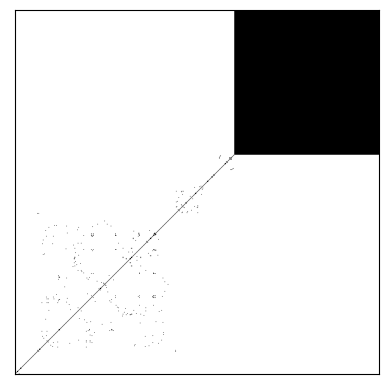

(1, 576, 576)


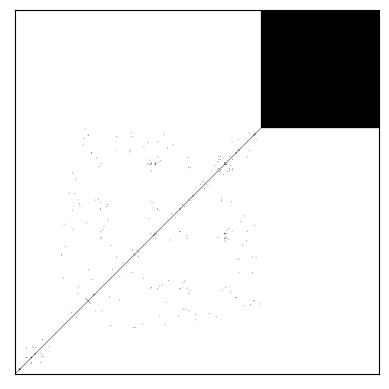

(1, 576, 576)


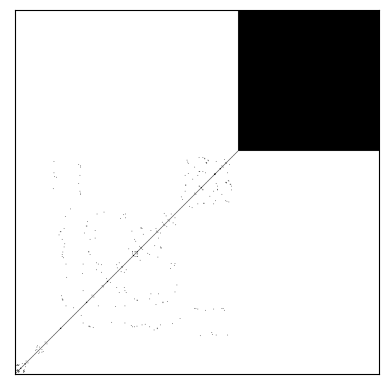

(1, 576, 576)


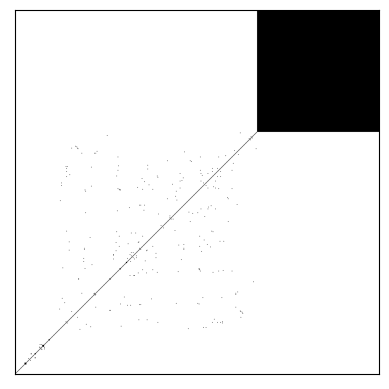

(1, 576, 576)


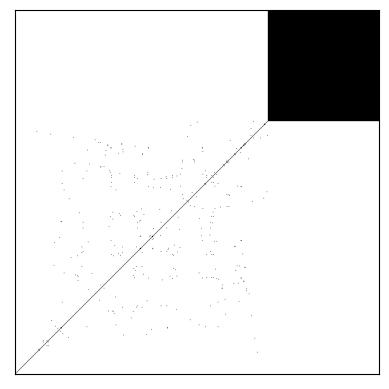

(1, 576, 576)


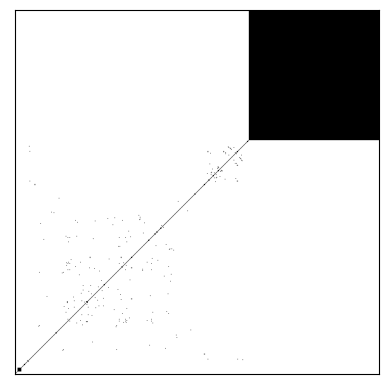

(1, 576, 576)


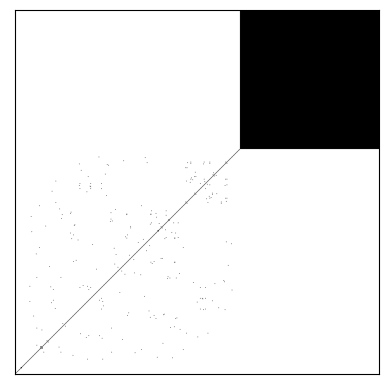

(1, 576, 576)


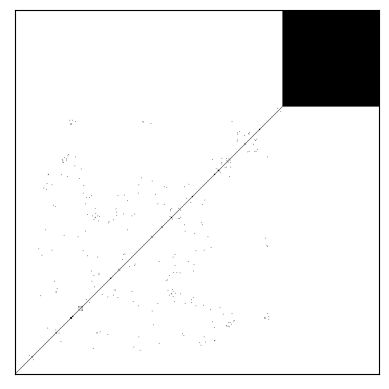

(1, 576, 576)


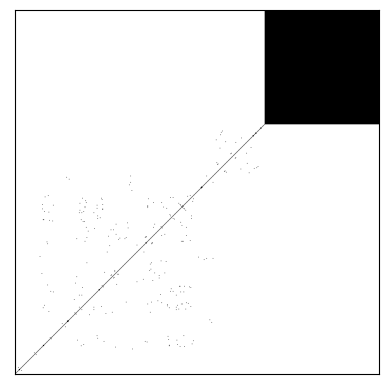

(1, 576, 576)


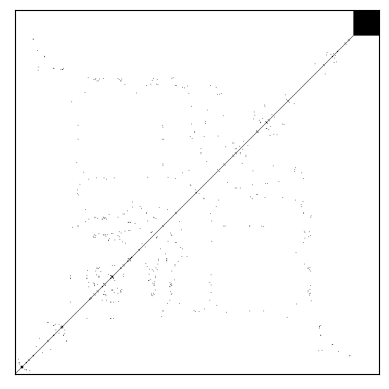

(1, 576, 576)


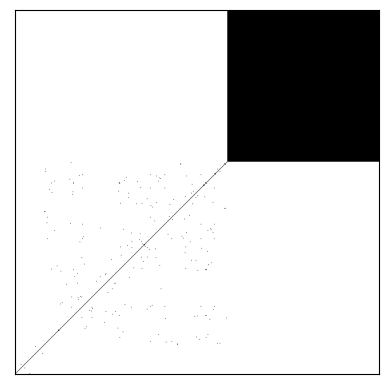

(1, 576, 576)


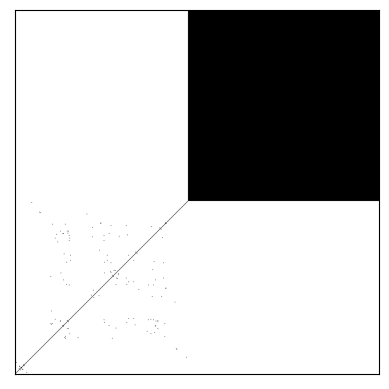

(1, 576, 576)


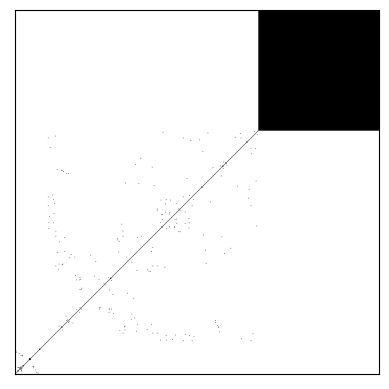

(1, 576, 576)


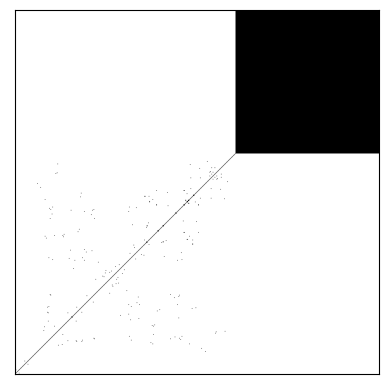

(1, 576, 576)


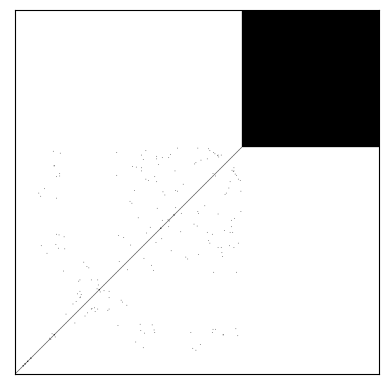

(1, 576, 576)


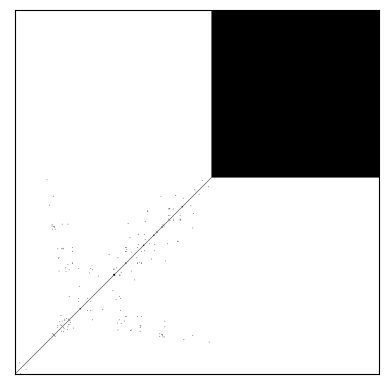

(1, 576, 576)


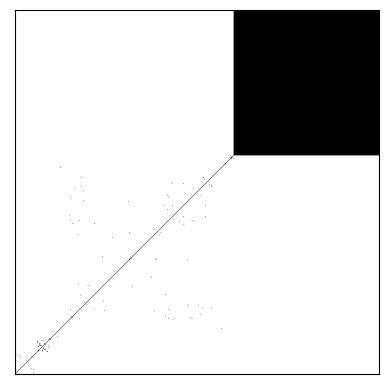

(1, 576, 576)


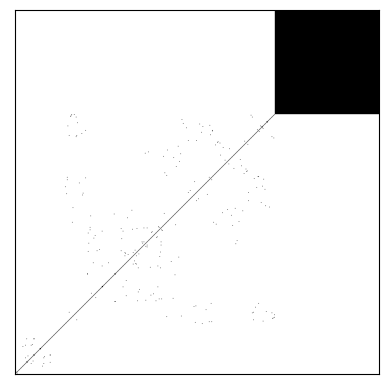

(1, 576, 576)


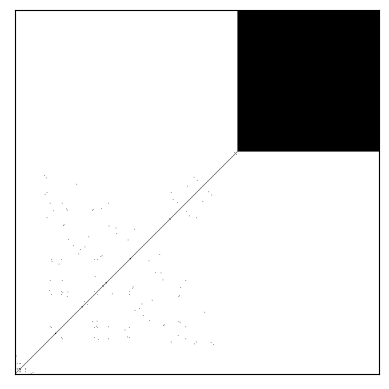

(1, 576, 576)


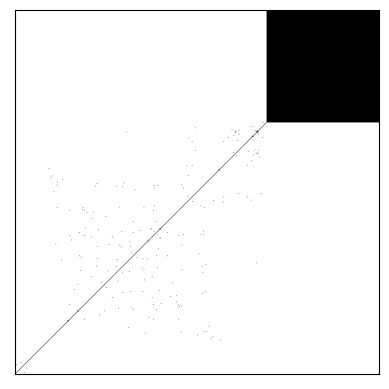

(1, 576, 576)


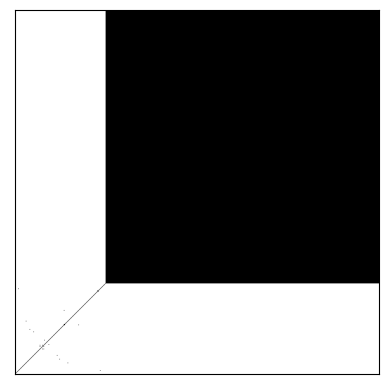

(1, 576, 576)


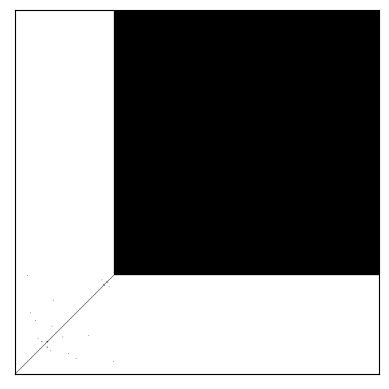

(1, 576, 576)


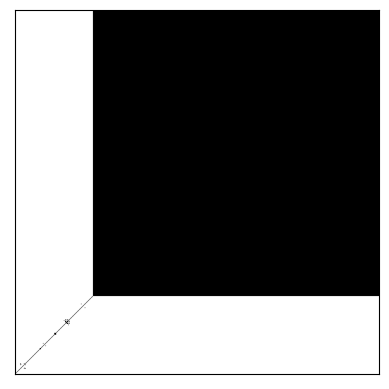

(1, 576, 576)


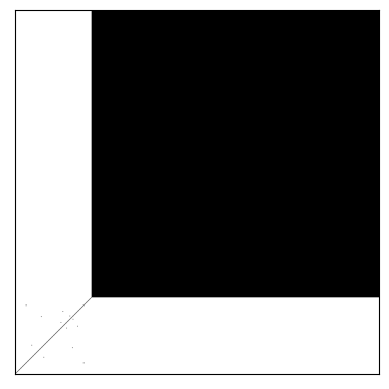

(1, 576, 576)


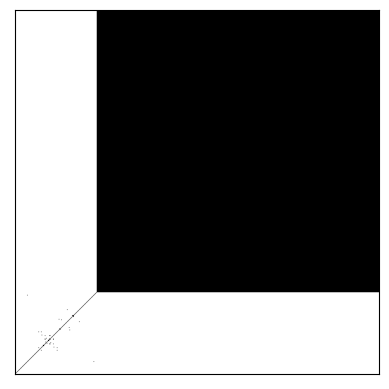

(1, 576, 576)


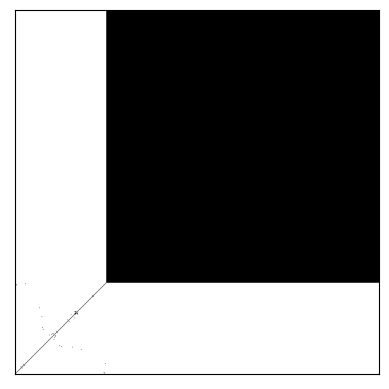

(1, 576, 576)


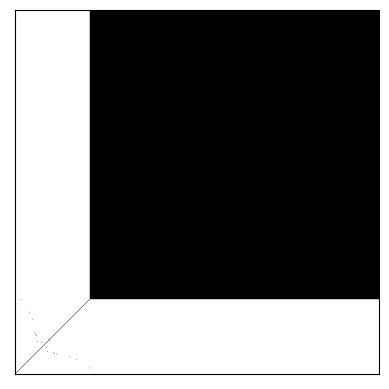

(1, 576, 576)


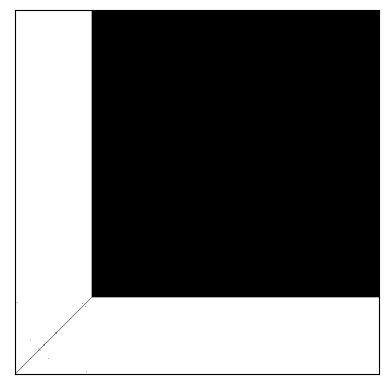

(1, 576, 576)


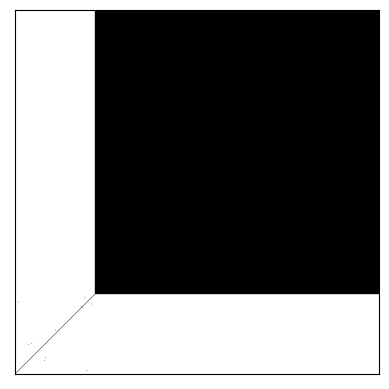

(1, 576, 576)


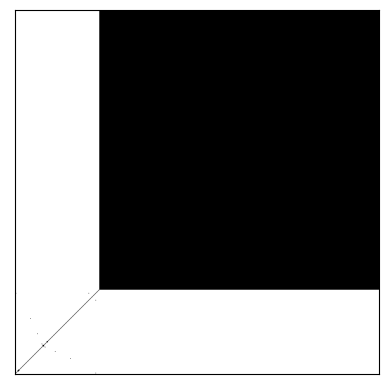

(1, 576, 576)


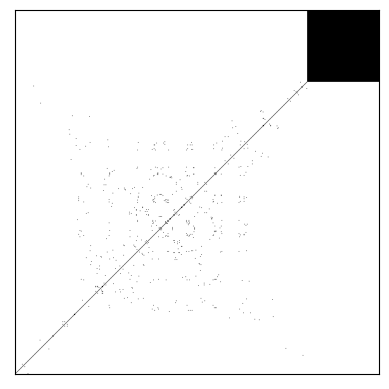

(1, 576, 576)


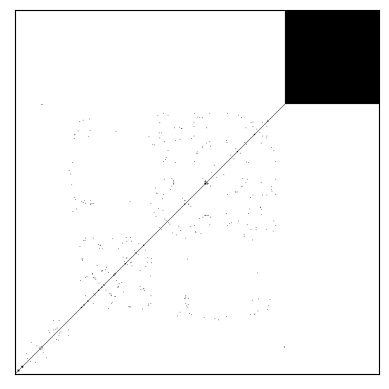

(1, 576, 576)


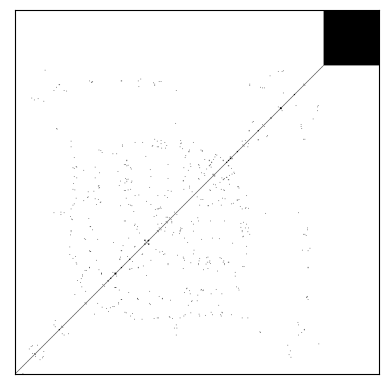

(1, 576, 576)


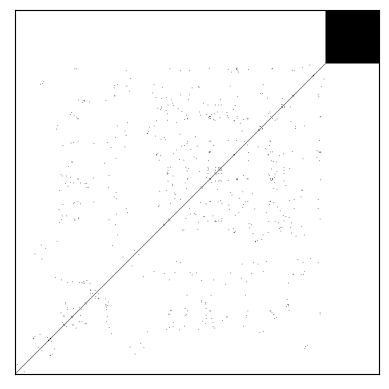

(1, 576, 576)


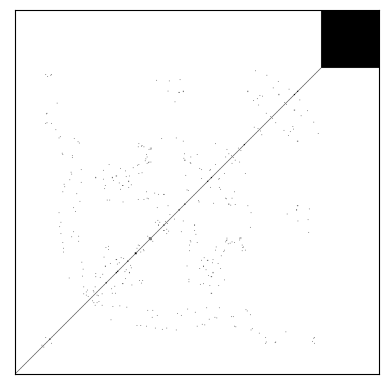

(1, 576, 576)


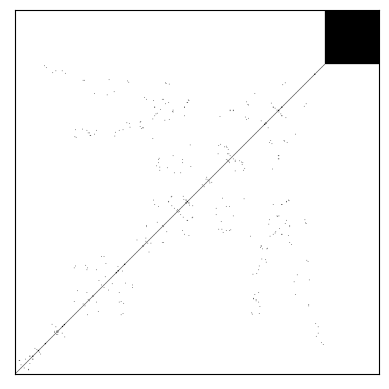

(1, 576, 576)


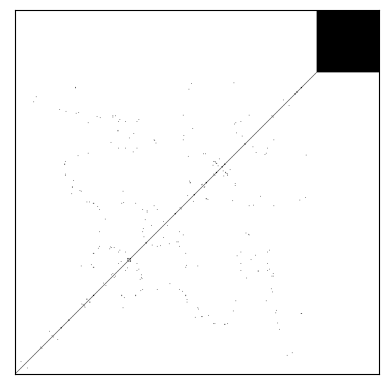

(1, 576, 576)


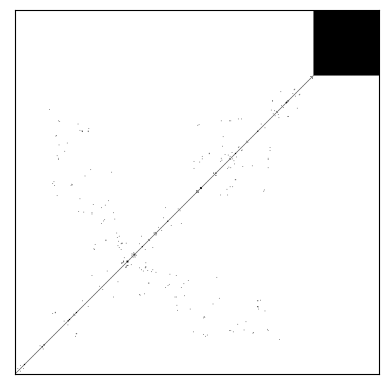

(1, 576, 576)


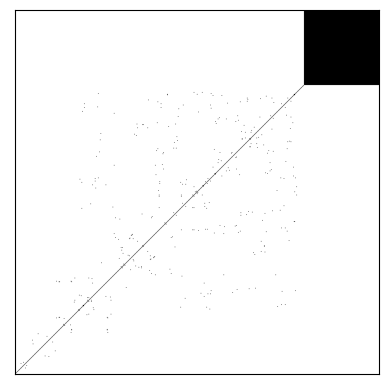

(1, 576, 576)


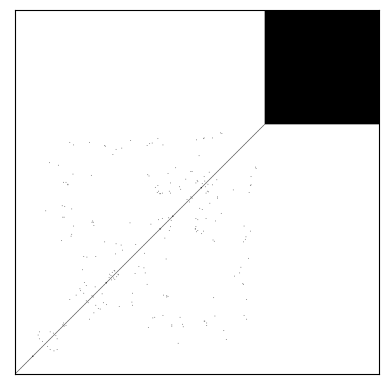

(1, 576, 576)


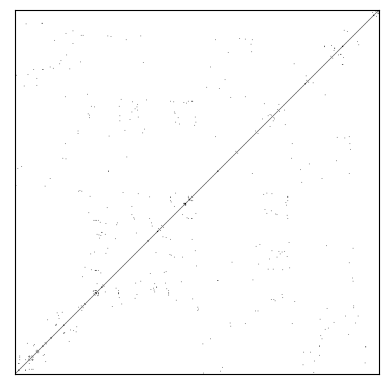

(1, 576, 576)


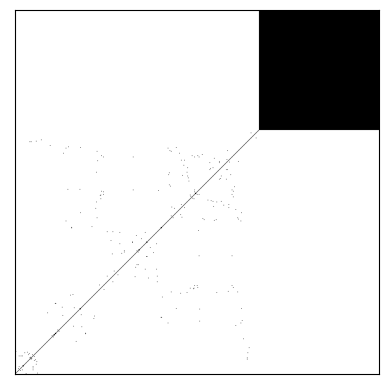

(1, 576, 576)


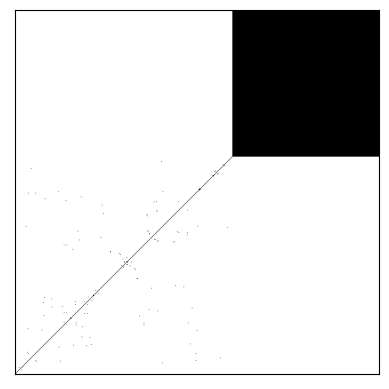

(1, 576, 576)


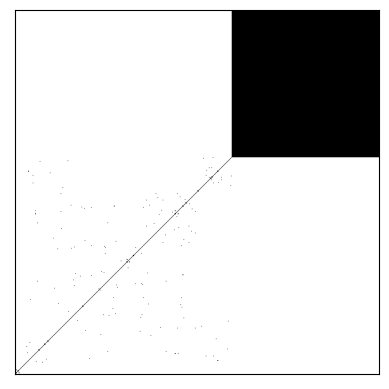

(1, 576, 576)


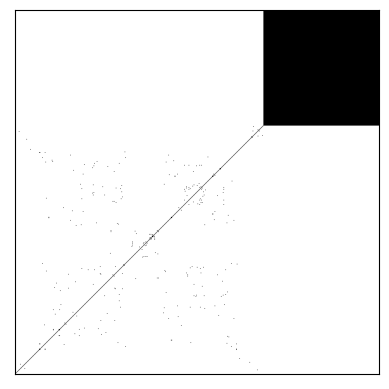

(1, 576, 576)


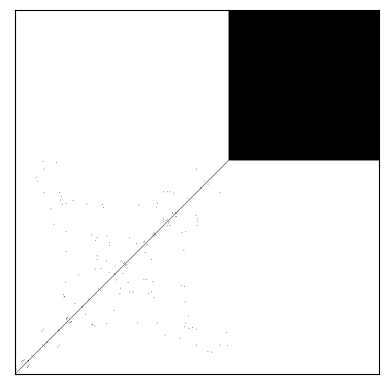

(1, 576, 576)


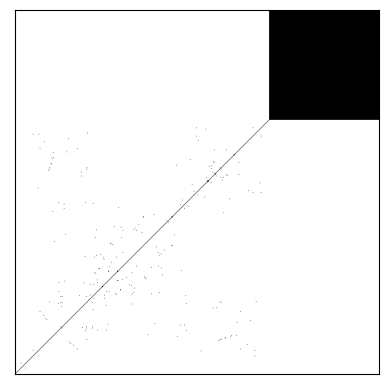

(1, 576, 576)


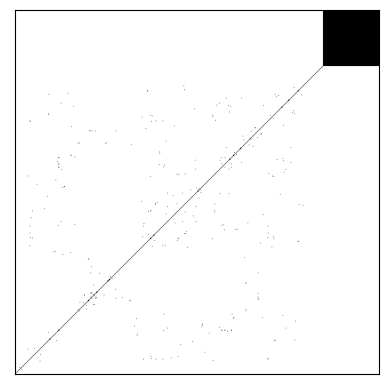

(1, 576, 576)


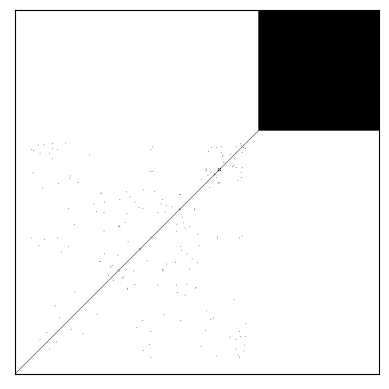

(1, 576, 576)


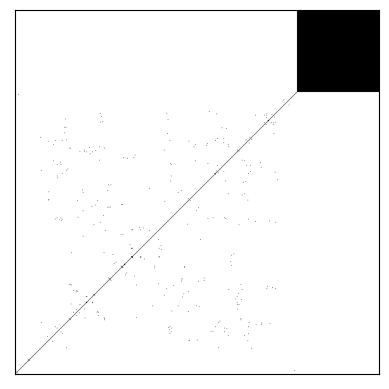

(1, 576, 576)


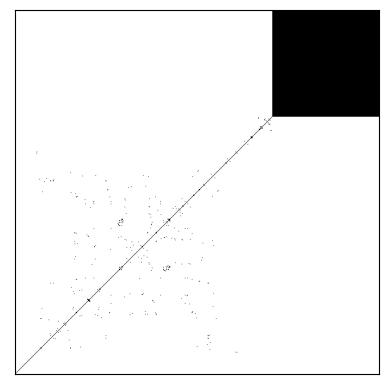

(1, 576, 576)


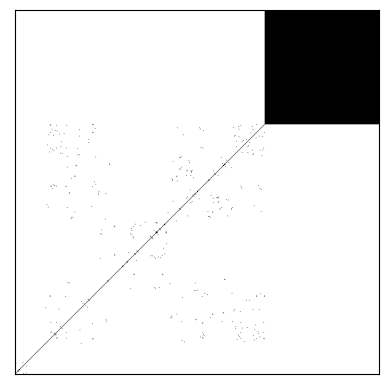

(1, 576, 576)


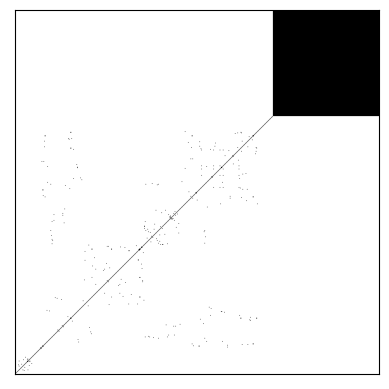

(1, 576, 576)


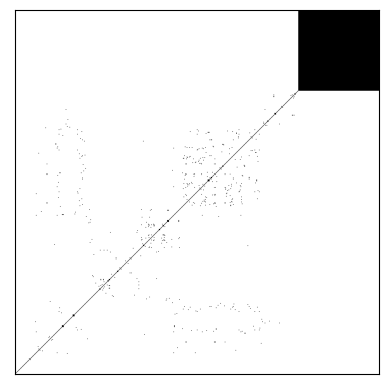

(1, 576, 576)


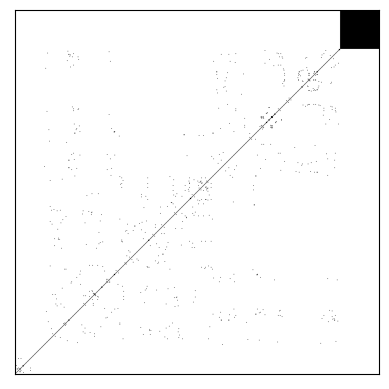

(1, 576, 576)


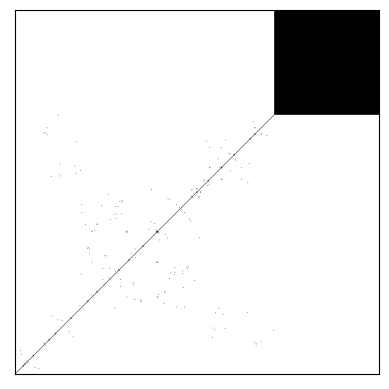

(1, 576, 576)


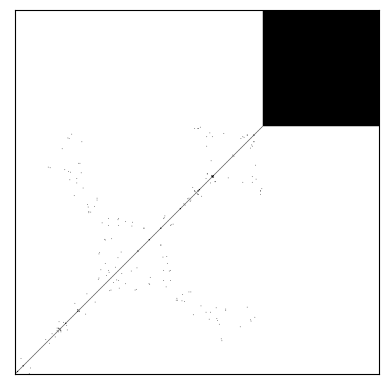

(1, 576, 576)


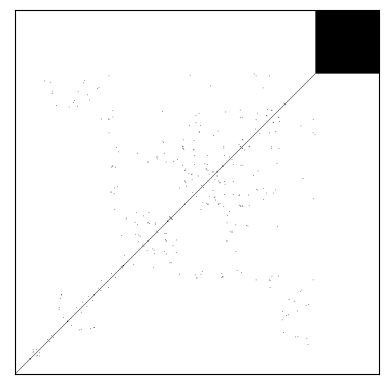

(1, 576, 576)


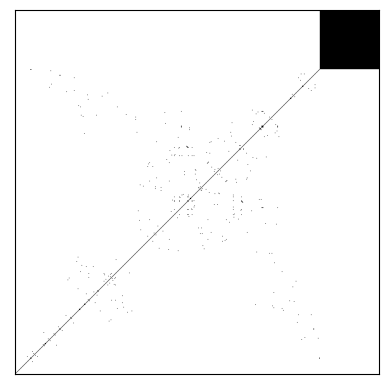

(1, 576, 576)


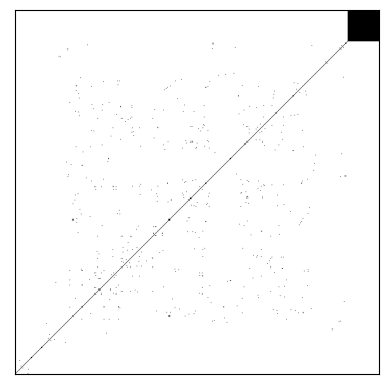

(1, 576, 576)


In [8]:
import matplotlib.pyplot as plt
import numpy as np
from pyts.image import RecurrencePlot

y = np.linspace(0,576,576)

# Create a toy time series using the sine function
#time_points = np.linspace(0, 4 * np.pi, 1000)
#x = np.sin(time_points)

a = 30

x = vidcoordinates[a]

print(vidvalue[a])

X = np.array([x])

plt.xlabel('Frame')
plt.ylabel('Distans från toppen av videon')
plt.title('NIHSS-poäng: 0')
plt.plot(y, x, linewidth=2.0)

# Recurrence plot transformation

listofrp = []

for i in vidcoordinates:
    
    x = i
    X = np.array([x])
    rp = RecurrencePlot(threshold=np.pi/18)
    X_rp = rp.transform(X)

    # Plot the time series and its recurrence plot
    fig = plt.figure(figsize=(6, 6))

    gs = fig.add_gridspec(2, 2,  width_ratios=(2, 7), height_ratios=(2, 7),
                          left=0.1, right=0.9, bottom=0.1, top=0.9,
                          wspace=0.05, hspace=0.05)


    # Plot the recurrence plot on the bottom right
    ax_rp = fig.add_subplot(gs[1, 1])
    ax_rp.imshow(X_rp[0], cmap='binary', origin='lower',
                 extent=[0, 4 * np.pi, 0, 4 * np.pi])
    ax_rp.set_xticks([])
    ax_rp.set_yticks([])

    plt.show()

    X_rp2 = np.transpose(X_rp)
    print(X_rp.shape)
    
    listofrp.append(X_rp)

In [7]:
print(len(vidvalue))
print(len(vidcoordinates))

120
120


In [8]:
#Denna cell är själva neurala nätverket, så lägg in en till cell under som tar samma input men med annan ML-algoritm

from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from tensorflow.keras import datasets, layers, models
import tensorflow as tf

import numpy as np

y = np.array(vidvalue)
X = np.array(vidcoordinates)



X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)
#X_train, X_test = X_train / 1080.0, X_test / 1080.0
print(X_train)
print(y_train)
#Gammalt

X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)


model = tf.keras.models.Sequential([
  #tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              #loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(X_train, y_train,
           batch_size=25,
           epochs=6,
           verbose=1,
           validation_data=(X_test, y_test))

model.evaluate(X_test, y_test)

C:\Users\marcu\AppData\Local\Temp\ipykernel_1432\3960730150.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array(vidcoordinates)


[list([270.24909525427086, 258.8070893430846, 255.38899984457296, 258.5584215434467, 259.8684856074374, 259.94776338979017, 257.5655749380077, 259.0877290721523, 285.3684046319281, 297.9324605912768, 303.4770053223616, 307.74657278570135, 312.21449550222724, 319.4829005245723, 315.4211113302322, 285.39749889840346, 325.602443422151, 332.33166158895216, 337.6741390806575, 352.3014392892284, 370.98847186926844, 394.15744462956155, 416.7191612421209, 427.0688544926037, 424.66136963786926, 455.98321427593856, 473.7079479127198, 489.95949690379854, 502.0964968177517, 508.2566639132788, 503.6649940135118, 504.6247596337463, 516.0404152545291, 527.8147808303385, 526.9469547848717, 535.4776531035217, 546.0895332898057, 562.2717495596776, 565.5656689503497, 563.6734552526378, 554.4647042537663, 569.6945993908864, 582.3737984269079, 583.9146200420307, 589.1814412730224, 597.4432122590857, 598.6209274346348, 602.3911487152718, 602.8416003718039, 601.5719695404778, 600.4431540058953, 599.849669699

ValueError: setting an array element with a sequence.

In [9]:
def plot_confusion_matrix(
    cm, classes, normalize=False, title="Confusion matrix", cmap=plt.cm.Blues
):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")

    print(cm)

    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(
            j,
            i,
            cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black",
        )

    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()

input_shape = (465, 930, 3)

# Define hyperparameters and their values for GridSearch
param_grid = {
    'learning_rate': [0.0001, 0.001],
    'hidden_layers': [1, 2],
}

combinations = [[0,0], [0,1], [1,0], [1,1]]

# Define hyperparameters and their values for GridSearch
param_grid2 = {
    'learning_rate': [0.0001, 0.001],
    'dropout_rate':  [0, 0.2],
    'hidden_layers': [1, 2],
}

combinations2 = [[0,0,0], [0,0,1], [0,1,0], [0,1,1], [1,0,0], [1,0,1], [1,1,0], [1,1,1]]

Sensitivity: 0.8571428571428571
Specificity: 0.9375
Confusion matrix, without normalization
[[15  1]
 [ 2 12]]


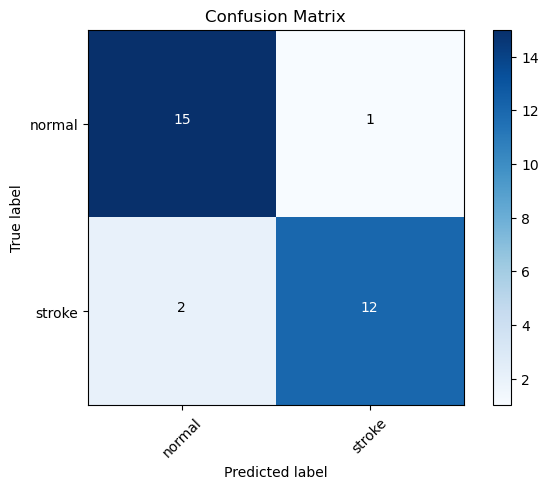

In [18]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import itertools

predictions = model.predict(x=X_test, verbose=0)
np.round(predictions)
cm = confusion_matrix(
    y_true=y_test, y_pred=np.argmax(predictions, axis=-1)
)

tn, fp, fn, tp = cm.ravel()

sensitivity = tp/(tp + fn)
specificity = tn / (tn + fp)

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

cm_plot_labels = ["normal","stroke"]
plot_confusion_matrix(cm=cm, classes = cm_plot_labels, title = "Confusion Matrix")


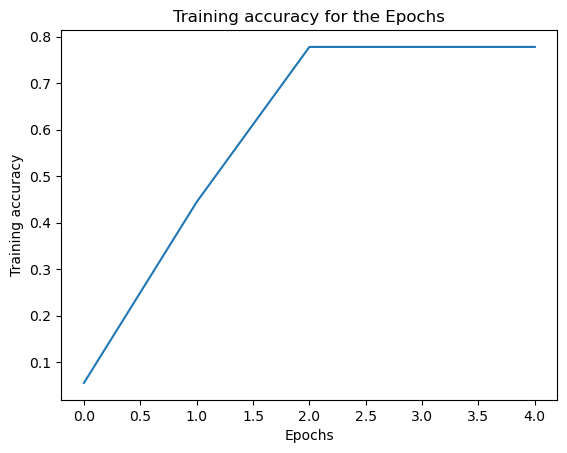

In [52]:
plt.plot(fit_info.history["accuracy"])
plt.title('Training accuracy for the Epochs')
plt.xlabel('Epochs')
plt.ylabel('Training accuracy')

plt.show()

In [19]:
from sklearn import decomposition, svm

rbf = svm.SVC(kernel='rbf', gamma=0.1, C=0.9).fit(X_train, y_train)
rbf_pred = rbf.predict(X_test)
svm_score = classification_report(y_test, rbf_pred)
rbf_accuracy = accuracy_score(y_test, rbf_pred)
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print(svm_score)

Accuracy (RBF Kernel):  46.67
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.47      1.00      0.64        14

    accuracy                           0.47        30
   macro avg       0.23      0.50      0.32        30
weighted avg       0.22      0.47      0.30        30



C:\Users\marcu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\marcu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\marcu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Sensitivity: 1.0
Specificity: 0.0
Confusion matrix, without normalization
[[ 0 16]
 [ 0 14]]


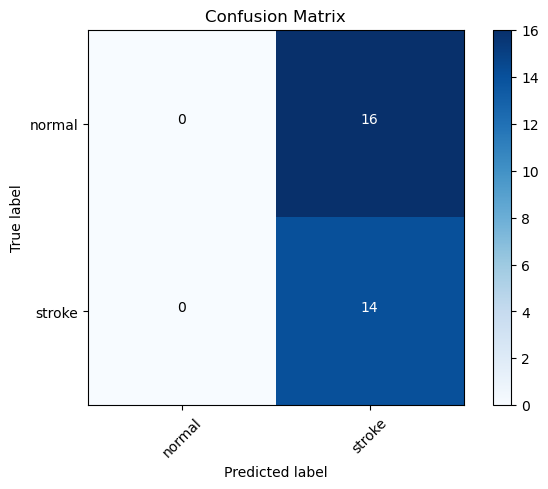

In [20]:
np.round(rbf_pred)

cm = confusion_matrix(y_true=y_test, y_pred=rbf_pred)

# extract true positives, false positives, true negatives, and false negatives
tn, fp, fn, tp = cm.ravel()

# calculate sensitivity and specificity
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

cm_plot_labels = ["normal", "stroke"]
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title="Confusion Matrix")

In [10]:
from keras.applications.resnet import ResNet152, ResNet50, ResNet101
from keras.models import Model
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
from tensorflow.keras import datasets, layers, models
import tensorflow as tf
from keras.optimizers import Adam, SGD
from PIL import Image
from keras.layers import (
    Conv2D,
    MaxPool2D,
    Flatten,
    Dense,
    InputLayer,
    Activation,
    BatchNormalization,
    GlobalAveragePooling2D,
    Dropout,
    RandomFourierFeatures,
    Input,
)

param_grid = {
    'learning_rate': [0.0001, 0.001],
    'hidden_layers': [1, 2],
}
combinations = [[0,0], [0,1], [1,0], [1,1]]

#buffert = listofrp[0]
#listofrp[0] = listofrp[2]
#listofrp[2] = buffert

y_rp = np.array(vidvalue)
#X_rp3 = np.array(listofrp)
X_rp3 = listofrp

# Resize images to 32x32
resized_images = []
for image in X_rp3:
    grayscale_image = image.squeeze(axis=0).astype('uint8')
    img = Image.fromarray(grayscale_image, mode='L')
    resized_img = img.resize((224,224))
    resized_np_img = np.array(resized_img)
    resized_images.append(resized_np_img)

# Convert the list of resized images back to NumPy array
X_rp_resized = np.array(resized_images)

# Reshape input data to match the model's input shape
X_rp_resized = np.expand_dims(X_rp_resized, axis=-1)

# Normalize the pixel values between 0 and 1
X_rp_resized = X_rp_resized.astype('float32')

# Update the input shape
input_shape = (224,224,1)

X_rp_train, X_rp_test, y_rp_train, y_rp_test = train_test_split(
    X_rp_resized, y_rp, test_size=0.25, random_state=42)
#X_train, X_test = X_train / 1080.0, X_test / 1080.0
print(X_rp_train)
print(y_rp_train)
#Gammalt

y_rp_test2 = y_rp_test

X_rp_train = tf.convert_to_tensor(X_rp_train, dtype=tf.float32)
y_rp_train = tf.convert_to_tensor(y_rp_train, dtype=tf.float32)


y_rp_train = to_categorical(y_rp_train, num_classes=2)
y_rp_test = to_categorical(y_rp_test, num_classes=2)

scores_resnet = []
models_resnet = []

for i in combinations:
    lr = param_grid['learning_rate'][i[0]]
    layers = param_grid['hidden_layers'][i[1]]
    print("Learning rate:", lr)
    print("Layers:", layers)

    # Create the base ResNet50 model
    base_model = ResNet152(weights=None, include_top=False, input_shape=input_shape)

    # Add a global average pooling layer and a dense layer with softmax activation for classification
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    for i in range(layers):
        x = Dense(128, activation="relu")(x)
    predictions = Dense(2, activation="softmax")(x)

    # Define the model to be trained with the ResNet50 base and the classification layers added
    model_resnet = Model(inputs=base_model.input, outputs=predictions)

    # Freeze the base ResNet50 layers so they are not updated during training
    for layer in base_model.layers:
        layer.trainable = False

    # Compile the model with a learning rate of 0.001 and a categorical cross-entropy loss function
    model_resnet.compile(
        optimizer=Adam(lr=lr), loss="categorical_crossentropy", metrics=["accuracy"]
    )

    model_resnet.fit(X_rp_train, y_rp_train,
           batch_size=25,
           epochs=3,
           verbose=1,
           validation_data=(X_rp_test, y_rp_test))
    score = model_resnet.evaluate(X_rp_test,y_rp_test, verbose=0)

    print("Test loss: {}, Test accuracy {}".format(score[0], score[1]))
    
    scores_resnet.append(score)
    models_resnet.append(model_resnet)

print(scores_resnet)

[[[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [1.]
   [1.]
   [1.]]

  [[0.]
   [0.]
   [0.]
   ...
   [1.]
   [1.]
   [1.]]

  [[0.]
   [0.]
   [0.]
   ...
   [1.]
   [1.]
   [1.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [1.]
   [1.]
   [1.]]

  [[0.]
   [0.]
   [0.]
   ...
   [1.]
   [1.]
   [1.]]

  [[0.]
   [0.]
   [0.]
   ...
   [1.]
   [1.]
   [1.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [1.]
   [1.]
   [1.]]

  [[0.]
   [0.]
   [0.]
   ...
   [1.]
   [1.]
   [1.]]

  [[0.

C:\Users\marcu\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/3
4/4 [==============================] - 48s 11s/step - loss: 0.6704 - accuracy: 0.4889 - val_loss: 0.6395 - val_accuracy: 0.5333
Epoch 2/3
4/4 [==============================] - 31s 8s/step - loss: 0.6498 - accuracy: 0.4889 - val_loss: 0.6336 - val_accuracy: 0.5333
Epoch 3/3
4/4 [==============================] - 28s 7s/step - loss: 0.6465 - accuracy: 0.4889 - val_loss: 0.6334 - val_accuracy: 0.5333
Test loss: 0.6334004998207092, Test accuracy 0.5333333611488342
Learning rate: 0.0001
Layers: 2
Epoch 1/3
4/4 [==============================] - 47s 11s/step - loss: 0.6988 - accuracy: 0.4667 - val_loss: 0.6725 - val_accuracy: 0.5333
Epoch 2/3
4/4 [==============================] - 36s 9s/step - loss: 0.6649 - accuracy: 0.4889 - val_loss: 0.6535 - val_accuracy: 0.5333
Epoch 3/3
4/4 [==============================] - 35s 9s/step - loss: 0.6513 - accuracy: 0.4889 - val_loss: 0.6433 - val_accuracy: 0.5333
Test loss: 0.6432735323905945, Test accuracy 0.5333333611488342
Learning rate: 0

Sensitivity: 0.14285714285714285
Specificity: 1.0
Confusion matrix, without normalization
[[16  0]
 [12  2]]


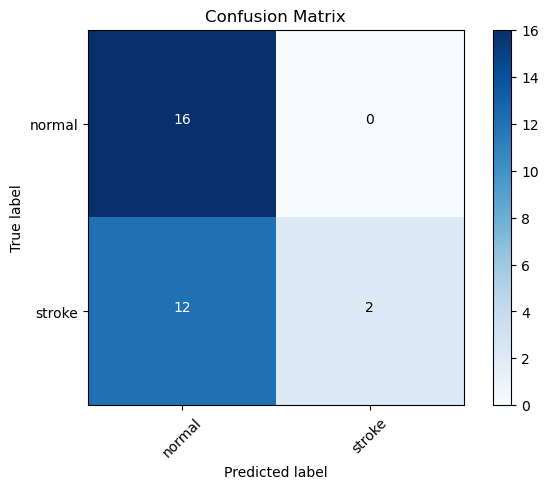

In [11]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import itertools

predictions = models_resnet[3].predict(x=X_rp_test, verbose=0)
np.round(predictions)
cm = confusion_matrix(
    y_true=y_rp_test2, y_pred=np.argmax(predictions,axis=-1)
)

tn, fp, fn, tp = cm.ravel()

sensitivity = tp/(tp + fn)
specificity = tn / (tn + fp)

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

cm_plot_labels = ["normal","stroke"]
plot_confusion_matrix(cm=cm, classes = cm_plot_labels, title = "Confusion Matrix")
